# Определение возраста покупателей

## Исследовательский анализ данных

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

(7591, 2)

'**************************************************'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


None

'**************************************************'

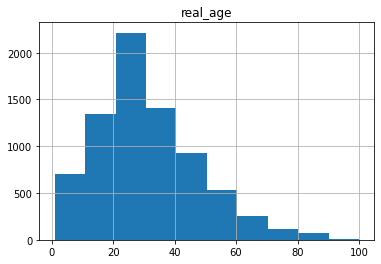

'**************************************************'

file_name    0
real_age     0
dtype: int64

'**************************************************'

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
5,000005.jpg,27
6,000006.jpg,24
7,000007.jpg,43
8,000008.jpg,26
9,000009.jpg,39


In [6]:
display(labels.shape)
display('*'*50)
display(labels.info())
display('*'*50)
labels.hist()
plt.show()
display('*'*50)
display(labels.isna().sum())
display('*'*50)
display(labels.head(10))

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


(32, 224, 224, 3)

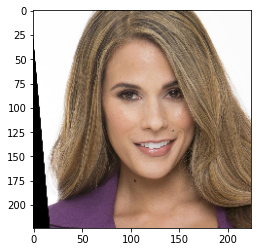

(32, 224, 224, 3)

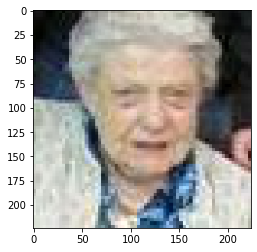

(32, 224, 224, 3)

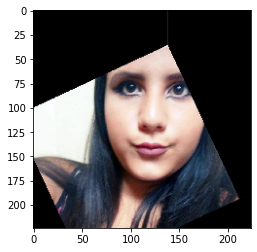

(32, 224, 224, 3)

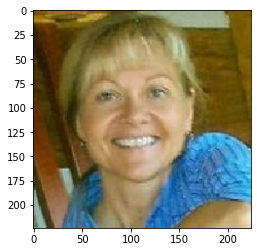

(32, 224, 224, 3)

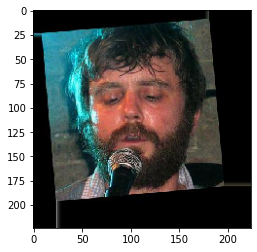

(32, 224, 224, 3)

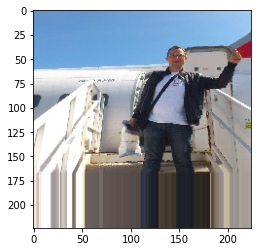

(32, 224, 224, 3)

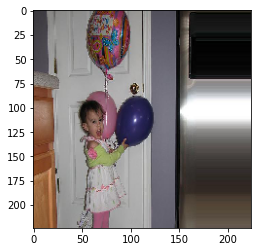

(32, 224, 224, 3)

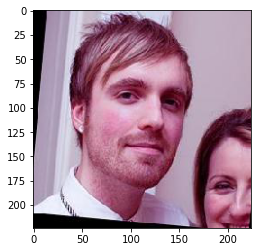

(32, 224, 224, 3)

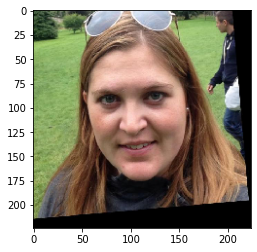

(32, 224, 224, 3)

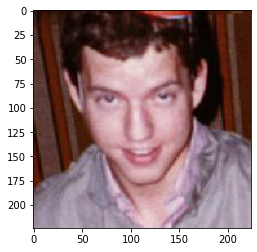

(32, 224, 224, 3)

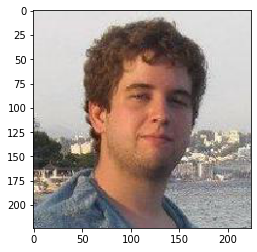

(32, 224, 224, 3)

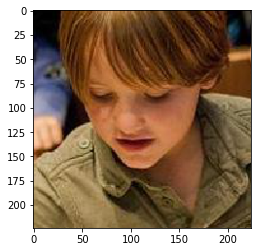

(32, 224, 224, 3)

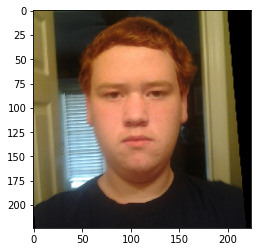

(32, 224, 224, 3)

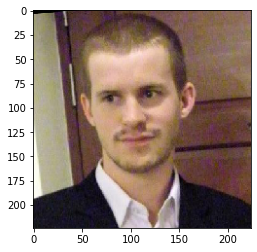

(32, 224, 224, 3)

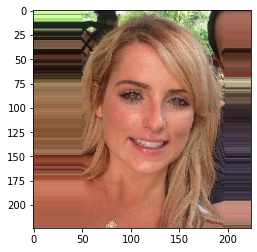

In [7]:
for i in range(0,15):
    features, target = next(train_gen_flow)
    display(features.shape)
    plt.imshow(features[0])
    plt.show()

- Данные имеют нормальное распределение.
- Пропусков в данных нет.
- Общее количество наблюдей 7591.
- Изображения приведены к размеру 224*224

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
import numpy as np
import tensorflow.compat.v2 as tf
import pandas as pd

optimizer = Adam(lr=0.0005)


train_datagen = ImageDataGenerator(
    validation_split=0.25,
    rescale=1. / 255)

def load_train(path):

   labels = pd.read_csv(path + 'labels.csv')

   print(path + 'final_files/')
   features_train = train_datagen.flow_from_dataframe(
       dataframe=labels,
       directory=path + 'final_files/',
       x_col='file_name',
       y_col='real_age',
       target_size=(224, 224),
       batch_size=32,
       class_mode='raw',
       seed=12345,
       subset='training')

   return features_train

def load_test(path):

   labels = pd.read_csv(path + 'labels.csv')
   features_train = train_datagen.flow_from_dataframe(
       dataframe=labels,
       directory=path + 'final_files/',
       x_col='file_name',
       y_col='real_age',
       target_size=(224, 224),
       batch_size=32,
       class_mode='raw',
       seed=12345,
       subset='validation')

   return features_train

def create_model(input_shape):

    backbone = ResNet50(input_shape=input_shape,
                        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])

    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=50,
               steps_per_epoch=None, validation_steps=None):

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)

    return model


```

```

2022-11-16 04:06:31.033053: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2022-11-16 04:06:31.034736: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
2022-11-16 04:06:31.888241: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-11-16 04:06:32.561189: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-11-16 04:06:32.561272: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-11-16 04:06:32.561304: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-11-16 04:06:32.563269: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-11-16 04:06:32.563690: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-11-16 04:06:32.565768: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2022-11-16 04:06:32.566939: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2022-11-16 04:06:32.567006: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-11-16 04:06:32.571380: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
Using TensorFlow backend.
/datasets/faces/final_files/
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2022-11-16 04:06:32.793758: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-11-16 04:06:32.800420: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2099995000 Hz
2022-11-16 04:06:32.800941: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x4108cb0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-11-16 04:06:32.800970: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-11-16 04:06:32.944910: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3768fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-11-16 04:06:32.944948: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2022-11-16 04:06:32.947305: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-11-16 04:06:32.947363: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-11-16 04:06:32.947374: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-11-16 04:06:32.947400: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-11-16 04:06:32.947409: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-11-16 04:06:32.947418: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2022-11-16 04:06:32.947427: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2022-11-16 04:06:32.947435: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-11-16 04:06:32.951737: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2022-11-16 04:06:32.951812: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-11-16 04:06:33.269393: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-11-16 04:06:33.269454: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2022-11-16 04:06:33.269462: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2022-11-16 04:06:33.273949: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-11-16 04:06:33.274001: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10240 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/50
2022-11-16 04:06:43.560899: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-11-16 04:06:43.849559: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 46s - loss: 11.0303 - mae: 11.0303 - val_loss: 17.2804 - val_mae: 17.2629
Epoch 2/50
178/178 - 37s - loss: 8.5401 - mae: 8.5407 - val_loss: 18.2077 - val_mae: 18.1949
Epoch 3/50
178/178 - 37s - loss: 7.6009 - mae: 7.6007 - val_loss: 13.0049 - val_mae: 12.9689
Epoch 4/50
178/178 - 37s - loss: 6.7152 - mae: 6.7152 - val_loss: 11.5588 - val_mae: 11.5381
Epoch 5/50
178/178 - 37s - loss: 6.0854 - mae: 6.0857 - val_loss: 9.1230 - val_mae: 9.0637
Epoch 6/50
178/178 - 37s - loss: 5.5999 - mae: 5.6000 - val_loss: 8.2882 - val_mae: 8.2522
Epoch 7/50
178/178 - 37s - loss: 5.0642 - mae: 5.0644 - val_loss: 9.4525 - val_mae: 9.4598
Epoch 8/50
178/178 - 37s - loss: 4.7653 - mae: 4.7657 - val_loss: 7.6955 - val_mae: 7.6891
Epoch 9/50
178/178 - 37s - loss: 4.3675 - mae: 4.3676 - val_loss: 8.4404 - val_mae: 8.3938
Epoch 10/50
178/178 - 37s - loss: 4.2338 - mae: 4.2338 - val_loss: 8.0552 - val_mae: 8.0388
Epoch 11/50
178/178 - 37s - loss: 3.8433 - mae: 3.8434 - val_loss: 7.0250 - val_mae: 7.0498
Epoch 12/50
178/178 - 37s - loss: 3.6854 - mae: 3.6855 - val_loss: 6.8543 - val_mae: 6.8266
Epoch 13/50
178/178 - 37s - loss: 3.4346 - mae: 3.4347 - val_loss: 7.6286 - val_mae: 7.6367
Epoch 14/50
178/178 - 37s - loss: 3.3232 - mae: 3.3233 - val_loss: 7.0126 - val_mae: 7.0129
Epoch 15/50
178/178 - 37s - loss: 3.1430 - mae: 3.1432 - val_loss: 7.4070 - val_mae: 7.3899
Epoch 16/50
178/178 - 37s - loss: 2.9228 - mae: 2.9227 - val_loss: 6.6450 - val_mae: 6.6669
Epoch 17/50
178/178 - 37s - loss: 2.8241 - mae: 2.8241 - val_loss: 6.9772 - val_mae: 7.0026
Epoch 18/50
178/178 - 37s - loss: 2.7535 - mae: 2.7536 - val_loss: 7.6684 - val_mae: 7.6515
Epoch 19/50
178/178 - 37s - loss: 2.7068 - mae: 2.7066 - val_loss: 6.6566 - val_mae: 6.6702
Epoch 20/50
178/178 - 37s - loss: 2.5614 - mae: 2.5616 - val_loss: 7.1806 - val_mae: 7.1974
Epoch 21/50
178/178 - 37s - loss: 2.5094 - mae: 2.5091 - val_loss: 7.0382 - val_mae: 7.0688
Epoch 22/50
178/178 - 37s - loss: 2.4422 - mae: 2.4421 - val_loss: 7.3309 - val_mae: 7.3415
Epoch 23/50
178/178 - 37s - loss: 2.4408 - mae: 2.4410 - val_loss: 7.1062 - val_mae: 7.1044
Epoch 24/50
178/178 - 37s - loss: 2.2955 - mae: 2.2956 - val_loss: 7.1382 - val_mae: 7.1288
Epoch 25/50
178/178 - 37s - loss: 2.2677 - mae: 2.2677 - val_loss: 7.6597 - val_mae: 7.6721
Epoch 26/50
178/178 - 37s - loss: 2.2005 - mae: 2.2005 - val_loss: 6.5936 - val_mae: 6.6027
Epoch 27/50
178/178 - 37s - loss: 2.1766 - mae: 2.1766 - val_loss: 6.5035 - val_mae: 6.5114
Epoch 28/50
178/178 - 37s - loss: 2.0960 - mae: 2.0961 - val_loss: 6.7076 - val_mae: 6.7252
Epoch 29/50
178/178 - 37s - loss: 2.0413 - mae: 2.0413 - val_loss: 7.4528 - val_mae: 7.4896
Epoch 30/50
178/178 - 37s - loss: 2.0155 - mae: 2.0154 - val_loss: 6.9612 - val_mae: 6.9726
Epoch 31/50
178/178 - 37s - loss: 2.0199 - mae: 2.0200 - val_loss: 6.4996 - val_mae: 6.5164
Epoch 32/50
178/178 - 37s - loss: 1.9600 - mae: 1.9601 - val_loss: 6.7831 - val_mae: 6.7976
Epoch 33/50
178/178 - 37s - loss: 1.9026 - mae: 1.9024 - val_loss: 6.9600 - val_mae: 6.9564
Epoch 34/50
178/178 - 37s - loss: 1.9195 - mae: 1.9197 - val_loss: 6.4734 - val_mae: 6.4905
Epoch 35/50
178/178 - 37s - loss: 1.8374 - mae: 1.8374 - val_loss: 6.3849 - val_mae: 6.4163
Epoch 36/50
178/178 - 37s - loss: 1.8270 - mae: 1.8271 - val_loss: 6.5316 - val_mae: 6.5458
Epoch 37/50
178/178 - 37s - loss: 1.7784 - mae: 1.7783 - val_loss: 6.3856 - val_mae: 6.4040
Epoch 38/50
178/178 - 37s - loss: 1.7871 - mae: 1.7871 - val_loss: 6.5630 - val_mae: 6.5884
Epoch 39/50
178/178 - 37s - loss: 1.7790 - mae: 1.7791 - val_loss: 6.9015 - val_mae: 6.9047
Epoch 40/50
178/178 - 37s - loss: 1.7177 - mae: 1.7176 - val_loss: 6.8818 - val_mae: 6.8931
Epoch 41/50
178/178 - 37s - loss: 1.7026 - mae: 1.7027 - val_loss: 6.3666 - val_mae: 6.3746
Epoch 42/50
178/178 - 37s - loss: 1.6829 - mae: 1.6828 - val_loss: 7.3396 - val_mae: 7.3260
Epoch 43/50
178/178 - 37s - loss: 1.5922 - mae: 1.5923 - val_loss: 6.9581 - val_mae: 6.9889
Epoch 44/50
178/178 - 37s - loss: 1.5805 - mae: 1.5805 - val_loss: 6.6573 - val_mae: 6.6557
Epoch 45/50
178/178 - 37s - loss: 1.6193 - mae: 1.6192 - val_loss: 7.1137 - val_mae: 7.1219
Epoch 46/50
178/178 - 37s - loss: 1.5758 - mae: 1.5756 - val_loss: 7.0161 - val_mae: 7.0428
Epoch 47/50
178/178 - 37s - loss: 1.5721 - mae: 1.5721 - val_loss: 6.6750 - val_mae: 6.6732
Epoch 48/50
178/178 - 37s - loss: 1.4922 - mae: 1.4921 - val_loss: 7.2479 - val_mae: 7.2343
Epoch 49/50
178/178 - 37s - loss: 1.5207 - mae: 1.5208 - val_loss: 6.7604 - val_mae: 6.7775
Epoch 50/50
178/178 - 37s - loss: 1.5427 - mae: 1.5428 - val_loss: 6.5692 - val_mae: 6.5885
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 9s - loss: 6.5692 - mae: 6.5885
Test MAE: 6.5885

```

## Анализ обученной модели

- Данные имеют нормальное распределение.
- Пропусков в данных нет.
- Общее количество наблюдей 7591.
- Изображения имеют размер 224*224
- Удалось получить МАЕ=7.45, что дает среднюю погрешность в 7,5 лет. 